### Import

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

### Load data

In [252]:
df_raw = pd.read_csv('data/companies.csv')

In [80]:
df_raw.head(5)

,name,industry,office,size,review_counts,salaries_count,jobs_count,interviews_count,benefits_count,website,company_type,revenue,head_quarter,founded,interview_possitive,interview_negative,interview_neutral,interview_difficulty,benefits_score,rating,total_insurance_health_wellness_benefits,health_insurance,dental_insurance,FSA,vision insurance,HSA,life_insurance,supplemental_life_insurance,disability_insurance,occupational_accident_insurance,heakth_care_on_site,mental_health_care,retiree_health_and_medical,accidental_death_and_dismemberment_insurance,total_financial_retirement_benefits,pension_plan,plan_401K,retirement_plan,employee_stock_purcase_plan,performance_bonus,stock_options,equity_incentive_plan,supplemental_workers_compensation,charity_gift_matching,total_family_parenting_benefits,maternity_paternity_leave,work_from_home,fertility_assistance,dependent_care,adoption_assistance,childcare,flexible_hour,military_leave,family_medical_leave,unpaid_extended_leave,total_vacation_time_off_benefits,vacation_paid_time_off,sick_days,paid_holidays,volunteer_time_off,sabbatical,bereavement_leave,total_perk_discounts_benefits,employee_discount,free_lunch_or_snacks,employee_assistance_program,gym_membership,commuter_checks_and_assistance,pet_friendly_worksplace,mobile_phone_discount,company_car,company_social_events,travel_concierge,legal_assistance,total_professional_support_benefits,diversity_program,job_training,professional_development,apprenticeship,tuition_assistance
0,Google,Internet,35 office locations,10000+ Employees,19.4K,43.8K,1.9K,13k,4.7k,https://www.google.com/,Company - Public (GOOG),$10+ billion (USD),"Mountain View, CA",1998.0,61%,15%,23%,3.3,4.7,4.5,13,1,1,1,1,1,1,1,1,1,1,1,1,1,7,0,1,1,0,1,1,1,1,1,8,1,1,0,0,1,1,1,1,1,1,5,1,1,1,1,0,1,11,1,1,1,1,1,1,1,1,1,1,1,4,1,1,1,0,1
1,Microsoft,Computer Hardware & Software,34 office locations,10000+ Employees,30.3K,68.8K,5.7K,10k,10k,https://www.microsoft.com/,Company - Public (MSFT),$10+ billion (USD),"Redmond, WA",1975.0,65%,13%,21%,3.1,4.5,4.4,12,1,1,1,1,1,1,1,1,1,1,1,0,1,8,0,1,1,1,1,1,1,1,1,10,1,1,1,1,1,1,1,1,1,1,6,1,1,1,1,1,1,9,1,1,1,1,1,0,1,0,1,1,1,5,1,1,1,1,1
2,Apple,Computer Hardware & Software,25 office locations,10000+ Employees,21.6K,63.6K,4.2K,8.5k,7.1k,https://www.apple.com/,Company - Public (AAPL),$10+ billion (USD),"Cupertino, CA",1976.0,65%,15%,20%,3.0,4.5,4.3,12,1,1,1,1,1,1,1,1,1,0,1,1,1,7,0,1,1,1,0,1,1,1,1,9,1,1,1,1,1,1,0,1,1,1,6,1,1,1,1,1,1,9,1,1,1,1,1,0,1,0,1,1,1,4,1,1,1,0,1
3,US Air Force,Federal Agencies,40 office locations,10000+ Employees,17.1K,19.4K,4.8K,1.0k,7.6k,https://www.af.mil/,Government,$10+ billion (USD),"Washington, DC",1947.0,70%,5%,24%,2.2,4.5,4.2,11,1,1,0,1,0,1,1,1,1,1,1,1,1,4,1,1,1,0,0,0,0,1,0,9,1,0,1,1,1,1,1,1,1,1,6,1,1,1,1,1,1,10,1,1,1,1,1,0,1,1,1,1,1,5,1,1,1,1,1
4,Cisco Systems,Computer Hardware & Software,25 office locations,10000+ Employees,22.4K,42.5K,1.9K,4.3k,8.0k,https://www.cisco.com/,Company - Private,$10+ billion (USD),"San Jose, CA",1984.0,69%,11%,19%,3.0,4.2,4.2,13,1,1,1,1,1,1,1,1,1,1,1,1,1,8,0,1,1,1,1,1,1,1,1,10,1,1,1,1,1,1,1,1,1,1,5,1,1,1,1,0,1,9,1,1,1,1,1,0,1,0,1,1,1,5,1,1,1,1,1


In [253]:
df_raw.shape

(2651, 80)

### Data cleaning function

In [81]:
def data_cleaning(df):
    #drop duplicates
    df.drop_duplicates(inplace = True)
    
    # Office column (how many offices, nan = 1 office)
    df['office'] = df.office.str.split(' ', expand = True)[0]
    df['office'].fillna('1', inplace = True)
    df['office'] = pd.to_numeric(df.office)
    
    # change column name
    df.rename(columns = {'heakth_care_on_site': 'health_care_on_site'}, inplace = True)  
    
    # Create category column base on industry column
    df['category'] = df['industry']
      
    for index, indus in enumerate(df['category']):
        if indus in ['Accounting','Legal']:
            df['category'].iloc[index] = 'Accounting & Legal'

        elif indus == 'Aerospace & Defense':
            df['category'].iloc[index] = 'Aerospace & Defense'

        elif indus in ['Food Production','Farm Support Services']:
            df['category'].iloc[index] = 'Agriculture & Forestry'

        elif indus in ['Sports & Recreation','Museums, Zoos & Amusement Parks','Photography',
                       'Movie Theaters','Gambling','Performing Arts']:
            df['category'].iloc[index] = 'Arts, Entertainment & Recreation'

        elif indus == 'Biotech & Pharmaceuticals':
            df['category'].iloc[index] = 'Biotech & Pharmaceuticals'

        elif indus in ['Consulting','Staffing & Outsourcing',
                                    'Architectural & Engineering Services','Membership Organizations',
                                    'Building & Personnel Services','Security Services','Wholesale',
                                    'Research & Development','Advertising & Marketing','Business Service Centers & Copy Shops']:
            df['category'].iloc[index] = 'Business Services'

        elif indus == 'Construction' :
            df['category'].iloc[index] = 'Construction'

        elif indus in ['Health, Beauty, & Fitness','Consumer Product Rental']:
            df['category'].iloc[index] = 'Customer Services'

        elif indus in ['K-12 Education','Education Training Services','Colleges & Universities','Preschool & Child Care']:
            df['category'].iloc[index] = 'Education'

        elif indus in ['Investment Banking & Asset Management','Banks & Credit Unions',
                                    'Financial Transaction Processing','Brokerage Services',
                                    'Lending','Financial Analytics & Research','Stock Exchanges']:
            df['category'].iloc[index] = 'Finance'

        elif indus in ['Federal Agencies','Municipal Governments','State & Regional Agencies']:
            df['category'].iloc[index] = 'Goverment'

        elif indus == 'Health Care Services & Hospitals' :
            df['category'].iloc[index] = 'Health Care Services & Hospitals'

        elif indus in ['Internet','Computer Hardware & Software','IT Services',
                                   'Enterprise Software & Network Solutions']:
            df['category'].iloc[index] = 'Information Technology'

        elif indus in ['Insurance Carriers','Insurance Agencies & Brokerages']:
            df['category'].iloc[index] = 'Insurance'

        elif indus in ['Miscellaneous Manufacturing','Transportation Equipment Manufacturing',
                                    'Health Care Products Manufacturing','Electrical & Electronic Manufacturing',
                                    'Consumer Products Manufacturing','Food & Beverage Manufacturing',
                                    'Industrial Manufacturing','Chemical Manufacturing','Metal & Mineral Manufacturing']:
            df['category'].iloc[index] = 'Manufacturing'

        elif indus in ['Motion Picture Production & Distribution','TV Broadcast & Cable Networks',
                                    'Music Production & Distribution','Video Games','News Outlet','Radio','Publishing']:
            df['category'].iloc[index] = 'Media'

        elif indus in ['Social Assistance','Health Fundraising Organizations',
                                    'Grantmaking Foundations','Religious Organizations']:
            df['category'].iloc[index] = 'Non-Profit'

        elif indus in ['Oil & Gas Exploration & Production','Energy','Oil & Gas Services','Utilities','Mining']:
            df['category'].iloc[index] = 'Oil, Gas, Energy & Utilities'

        elif indus == 'Real Estate':
            df['category'].iloc[index] = 'Real Estate'

        elif indus in ['Fast-Food & Quick-Service Restaurants','Casual Restaurants',
                       'Catering & Food Service Contractors','Upscale Restaurants']:
            df['category'].iloc[index] = 'Restaurants, Bars & Food Services'

        elif indus in ['General Merchandise & Superstores','Department, Clothing, & Shoe Stores',
                                    'Home Furniture & Housewares Stores','Home Centers & Hardware Stores',
                                    'Grocery Stores & Supermarkets','Consumer Electronics & Appliances Stores',
                                    'Drug & Health Stores','Food & Beverage Stores','Pet & Pet Supplies Stores',
                                    'Beauty & Personal Accessories Stores','Automotive Parts & Accessories Stores',
                                    'Other Retail Stores','Office Supply Stores','Vehicle Dealers',
                                    'Sporting Goods Stores','Toy & Hobby Stores',
                                    'Commercial Equipment Repair & Maintenance','General Repair & Maintenance',
                                    'Veterinary Services','Auctions & Galleries','Commercial Equipment Rental',
                                    'Media & Entertainment Retail Stores','Gift, Novelty & Souvenir Stores']:
            df['category'].iloc[index] = 'Retail'

        elif indus in ['Telecommunications Services','Cable, Internet & Telephone Providers',
                                    'Telecommunications Manufacturing']:
            df['category'].iloc[index] = 'Telecommunications'

        elif indus in ['Logistics & Supply Chain','Express Delivery Services','Transportation Management',
                       'Rail','Trucking','Bus Transportation Services', 'Truck Rental & Leasing','Gas Stations',
                      'Convenience Stores & Truck Stops','Shipping']:
            df['category'].iloc[index] = 'Transportation & Logistics'

        elif indus in ['Hotels, Motels, & Resorts','Airlines','Car Rental','Cruise Ships','Travel Agencies']:
            df['category'].iloc[index] = 'Travel & Tourism'


    # convert review_counts,salaries_count,jobs_count,interviews_count,benefits_count into numeric

    # review counts
    df.review_counts[df.review_counts == '--'] = '0'
    df.review_counts = (df.review_counts.replace(r'[K,k]+$', '', regex=True).astype(float) * \
         df.review_counts.str.extract(r'[\d\.]+([K,k]+)', expand=False)
        .fillna(1)
        .replace(['K','k'], [10**3,10**3]).astype(int))
    
    # salaries review count
    df.salaries_count[df.salaries_count == '--'] = '0'
    df.salaries_count = (df.salaries_count.replace(r'[K,k]+$', '', regex=True).astype(float) * \
         df.salaries_count.str.extract(r'[\d\.]+([K,k]+)', expand=False)
        .fillna(1)
        .replace(['K','k'], [10**3,10**3]).astype(int))
    
    #jobs review counts
    df.jobs_count[df.jobs_count == '--'] = '0'
    df.jobs_count = (df.jobs_count.replace(r'[K,k]+$', '', regex=True).astype(float) * \
         df.jobs_count.str.extract(r'[\d\.]+([K,k]+)', expand=False)
        .fillna(1)
        .replace(['K','k'], [10**3,10**3]).astype(int))
    
    # inteviews review counts
    df.interviews_count[df.interviews_count == '--'] = '0'
    df.interviews_count = (df.interviews_count.replace(r'[K,k]+$', '', regex=True).astype(float) * \
         df.interviews_count.str.extract(r'[\d\.]+([K,k]+)', expand=False)
        .fillna(1)
        .replace(['K','k'], [10**3,10**3]).astype(int))
    
    
    # benefits review counts
    df.benefits_count[df.benefits_count == '--'] = '0'
    df.benefits_count = (df.benefits_count.replace(r'[K,k]+$', '', regex=True).astype(float) * \
         df.benefits_count.str.extract(r'[\d\.]+([K,k]+)', expand=False)
        .fillna(1)
        .replace(['K','k'], [10**3,10**3]).astype(int))
    
    
    # founded column
    df.founded.fillna(round(df.founded.mean(),0), inplace = True)
    
    # company size
    
    # 1  = less 5000 employees
    # 2 = 5001 to 10000 employees
    # 3 = 10000+ employees
    df['size'] = df['size'].map({'10000+ Employees': 3,
                             '5001 to 10000 Employees':2, 
                             '1001 to 5000 Employees' : 1,
                             '201 to 500 Employees' : 1,
                             '501 to 1000 Employees' : 1,
                             '1 to 50 Employees': 1,
                             'Unknown' :1})
    
    # delete null values 
    df.dropna(inplace = True)
    
    #interview_possitive, negative, neutral
    df.interview_possitive = pd.to_numeric(df.interview_possitive.str.strip('%'))/100
    df.interview_negative = pd.to_numeric(df.interview_negative.str.strip('%'))/100
    df.interview_neutral = pd.to_numeric(df.interview_neutral.str.strip('%'))/100
    
    # 1 = 'Unknown / Non-Applicable'
    # 2 = 'Less than $100 million (USD)'
    # 3 = '$100 to $500 million (USD)'
    # 4 = '$500 million to $1 billion (USD)'
    # 5 = '$1 to $2 billion (USD)'
    # 6 = '$2 to $5 billion (USD)' 
    # 7 = '$5 to $10 billion (USD)'
    # 8 = '$10+ billion (USD)'

    df['revenue'] = df['revenue'].map({'$10+ billion (USD)':8, 
                                       '$5 to $10 billion (USD)':7,
                                       '$2 to $5 billion (USD)' :6,
                                        '$1 to $2 billion (USD)':5,
                                       '$500 million to $1 billion (USD)':4,
                                       '$100 to $500 million (USD)' :3,
                                       '$50 to $100 million (USD)':2,               
                                        '$25 to $50 million (USD)':2, 
                                        '$10 to $25 million (USD)':2,                                    
                                        '$5 to $10 million (USD)':2,
                                        '$1 to $5 million (USD)':2,
                                        'Less than $1 million (USD)':2,  
                                        'Unknown / Non-Applicable':1})
    
    #company type
    df.company_type[df.company_type.str.contains('Public')] = 'Public'
    df.company_type[df.company_type.str.contains('Private')] = 'Private'
    df['company_type'] = df['company_type'].map({'Public' :'Public',
                                                 'Private' :'Private',
                                                'Subsidiary or Business Segment':'Subsidiary or Business Segment',
                                                'College / University':'Education',
                                                'Nonprofit Organization': 'Nonprofit Organization',
                                                 'Government': 'Government',
                                                 'Hospital':'Hospital',
                                                 'School / School District': 'Education',
                                                 'Franchise': 'Others',
                                                 'Unknown':'Others',
                                                 'Self-employed':'Others',
                                                 'Contract':'Others'})   
    
    # Create state column base on head quarter column
    df['state'] = df.head_quarter.apply(lambda head_quarter : head_quarter.split(',')[1])

    
    return df

### Call data cleaning fuction

In [101]:
df = data_cleaning(df_raw)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-81-07678196637d>:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.review_counts[df.review_counts == '--'] = '0'
<ipython-input-81-07678196637d>:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.salaries_count[df.salaries_count == '--'] = '0'
<ipython-inp

### Create company rank classification base on rating

In [134]:
# Create company rank column 
df['company_rank'] = df['rating']
for index, rk in enumerate(df['company_rank']):
    if rk >= 4.2:
        df['company_rank'].iloc[index] = 2
    elif (rk >= 3.9) & (rk < 4.2) :
        df['company_rank'].iloc[index] = 1
    else:   
    # bellow 3.9
        df['company_rank'].iloc[index] = 0
    

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [135]:
df['company_rank'] = df['company_rank'].astype(int)

### Base line 41%

In [137]:
df['company_rank'].value_counts(normalize= True)

1    0.409763
0    0.346171
2    0.244066
Name: company_rank, dtype: float64

### Explore Data Analysis

In [138]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
office,2233.0,14.355575,13.455017,1.0,4.0,10.0,25.0,148.0
size,2233.0,1.982535,0.906547,1.0,1.0,2.0,3.0,3.0
review_counts,2233.0,1986.352441,5246.256623,56.0,266.0,614.0,1700.0,77500.0
salaries_count,2233.0,2614.935961,7420.721956,23.0,314.0,767.0,2300.0,144500.0
jobs_count,2233.0,1106.618898,4687.087211,0.0,56.0,198.0,612.0,107800.0
...,...,...,...,...,...,...,...,...
job_training,2233.0,0.600090,0.489989,0.0,0.0,1.0,1.0,1.0
professional_development,2233.0,0.488133,0.499971,0.0,0.0,0.0,1.0,1.0
apprenticeship,2233.0,0.076579,0.265981,0.0,0.0,0.0,0.0,1.0
tuition_assistance,2233.0,0.417824,0.493311,0.0,0.0,0.0,1.0,1.0


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 0 to 2648
Data columns (total 83 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          2233 non-null   object 
 1   industry                                      2233 non-null   object 
 2   office                                        2233 non-null   int64  
 3   size                                          2233 non-null   int64  
 4   review_counts                                 2233 non-null   float64
 5   salaries_count                                2233 non-null   float64
 6   jobs_count                                    2233 non-null   float64
 7   interviews_count                              2233 non-null   float64
 8   benefits_count                                2233 non-null   float64
 9   website                                       2233 non-null   o

In [140]:
df[['name','rating']].sort_values('rating', ascending= False).head(30)

,name,rating
849,Asana,4.9
855,eXp Realty,4.8
49,NVIDIA,4.8
848,Sammons Financial Group Companies,4.8
850,Veterans United Home Loans,4.8
851,Family First Life,4.8
853,Five9,4.8
854,Bergstrom Automotive,4.8
865,Space Dynamics Laboratory,4.8
856,Curriculum Associates,4.8


In [141]:
size_df = pd.DataFrame(df.groupby('size').agg('mean')['company_rank'])

### Less than 5000 employees company has the best rank 

''

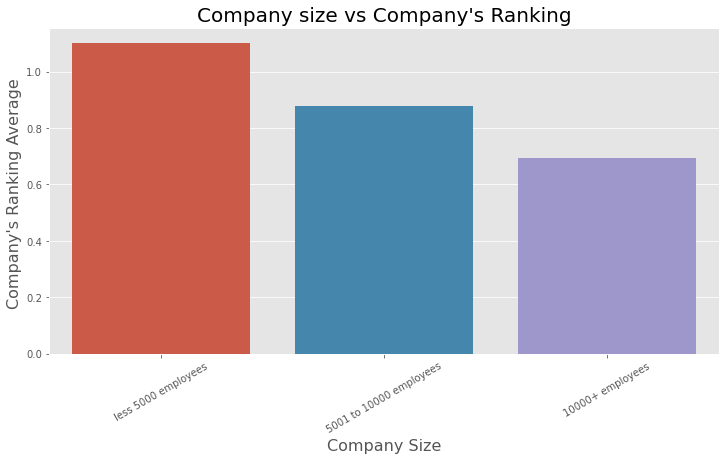

In [172]:
# 1  = less 5000 employees
# 2 = 5001 to 10000 employees
# 3 = 10000+ employees
plt.figure(figsize = (12,6))
sns.barplot(x = 'size', y = 'company_rank', data= size_df.reset_index().sort_values('company_rank'))
plt.xticks([0,1,2],['less 5000 employees','5001 to 10000 employees','10000+ employees'],rotation = 30)
plt.title("Company size vs Company's Ranking", fontsize = 20)
plt.xlabel('Company Size', fontsize = 16)
plt.ylabel("Company's Ranking Average ", fontsize = 16)
;

In [43]:
category_df = pd.DataFrame(df.groupby('category').agg('mean')['company_rank'])

In [44]:
category_df.sort_values('company_rank')

,company_rank
category,
Retail,0.405797
Transportation & Logistics,0.432432
"Restaurants, Bars & Food Services",0.532468
Insurance,0.740260
Business Services,0.750000
Telecommunications,0.758621
Health Care Services & Hospitals,0.783186
Travel & Tourism,0.785714
"Arts, Entertainment & Recreation",0.846154


### Biotech & Pharmaceuticals, Non-Profit, Construction, Real Estate, Education are the top 5

''

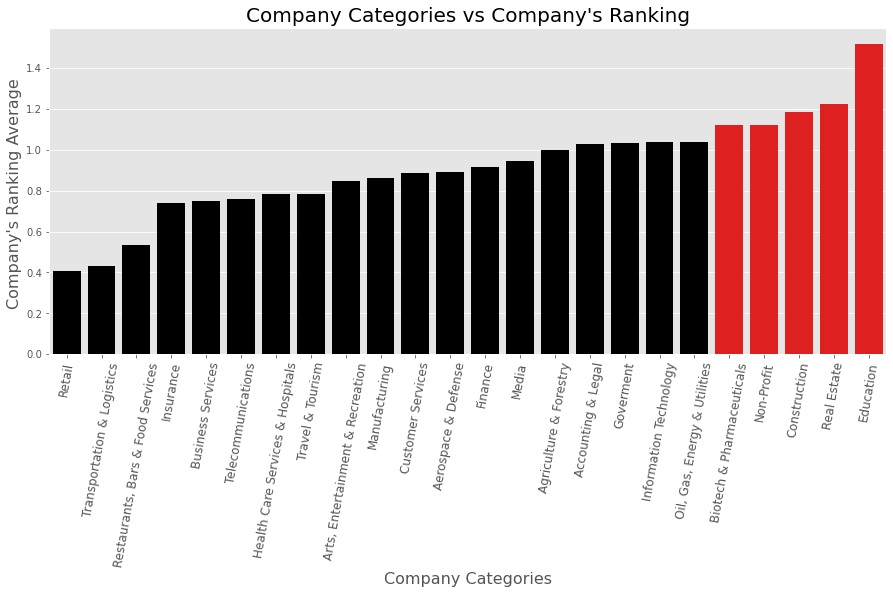

In [196]:
clrs = ['black' if (x < 1.1) else 'red' for x in category_df['company_rank'].sort_values()]
plt.figure(figsize = (15,6))
sns.barplot(x = 'category', y = 'company_rank', data= category_df.reset_index().sort_values('company_rank'), palette= clrs)
plt.title("Company Categories vs Company's Ranking", fontsize = 20)
plt.xlabel('Company Categories', fontsize = 16)
plt.ylabel("Company's Ranking Average ", fontsize = 16)
plt.xticks(rotation = 80, rotation_mode = 'default', fontsize = 12)
;

In [96]:
revenue_df = pd.DataFrame(df.groupby('revenue').agg('mean')['company_rank'])

### Company with  100 to 500 million (USD) revenue is the best

In [210]:
revenue_df

,company_rank
revenue,
1,0.988338
2,0.913793
3,1.120482
4,0.947368
5,0.851986
6,0.815625
7,0.748538
8,0.773109


''

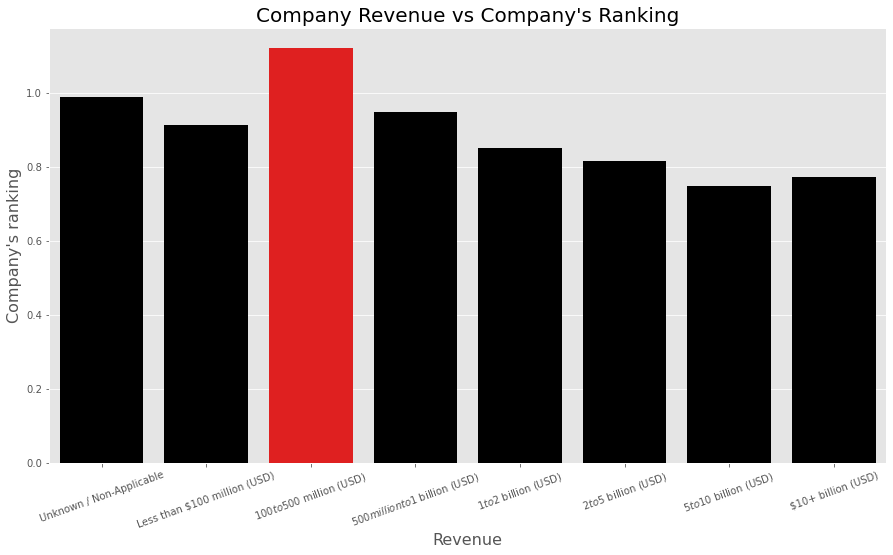

In [211]:
    # 1 = 'Unknown / Non-Applicable'
    # 2 = 'Less than $100 million (USD)'
    # 3 = '$100 to $500 million (USD)'
    # 4 = '$500 million to $1 billion (USD)'
    # 5 = '$1 to $2 billion (USD)'
    # 6 = '$2 to $5 billion (USD)' 
    # 7 = '$5 to $10 billion (USD)'
    # 8 = '$10+ billion (USD)'

plt.figure(figsize = (15,8))
clrs = ['black' if (x < 1.1) else 'red' for x in revenue_df['company_rank']]
sns.barplot(x = 'revenue', y = 'company_rank', data= revenue_df.reset_index().sort_values('company_rank'),palette = clrs)
plt.xticks(rotation = 45)
plt.title("Company Revenue vs Company's Ranking", fontsize = 20)
plt.xticks([0, 1, 2,3,4,5,6,7], ['Unknown / Non-Applicable','Less than $100 million (USD)','$100 to $500 million (USD)',
                        '$500 million to $1 billion (USD)','$1 to $2 billion (USD)','$2 to $5 billion (USD)', 
                        '$5 to $10 billion (USD)','$10+ billion (USD)'],rotation=20)
plt.xlabel('Revenue', fontsize = 16)
plt.ylabel("Company's ranking", fontsize = 16)
;


In [243]:
state_df = pd.DataFrame(df.groupby('state').agg('mean')['company_rank'])

In [244]:
state_df['state'] = state_df.index

In [245]:
state_df.reset_index(drop=True, inplace=True)

In [246]:
states_ls = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

In [248]:
['AL','OK'] in (states_ls)

False

In [242]:
state_df.value_counts()

company_rank  state        
2.000000       Russia          1
0.853659       MD              1
0.800000       ME              1
0.809524       WA              1
0.810127       OH              1
                              ..
1.000000       SD              1
               Saudi Arabia    1
               Switzerland     1
               Taiwan          1
0.000000       Belgium         1
Length: 84, dtype: int64

,company_rank
0,0.500000
1,0.933333
2,0.250000
3,0.783784
4,1.000000
...,...
79,1.000000
80,0.809524
81,0.848485
82,1.333333


In [236]:
states_ls = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
state_df[state_df['state']]

KeyError: "None of [Index([' 061', ' AL', ' AR', ' AZ', ' Australia', ' Austria', ' Belgium',\n       ' Bermuda', ' Brazil', ' CA', ' CO', ' CT', ' Canada', ' China', ' DC',\n       ' DE', ' Denmark', ' FL', ' Finland', ' France', ' GA', ' Germany',\n       ' HI', ' Hong Kong', ' IA', ' ID', ' IL', ' IN', ' India', ' Ireland',\n       ' Israel', ' Italy', ' Japan', ' KS', ' KY', ' LA', ' Luxembourg',\n       ' MA', ' MD', ' ME', ' MI', ' MN', ' MO', ' MS', ' MT', ' Man',\n       ' Mexico', ' NC', ' ND', ' NE', ' NH', ' NJ', ' NM', ' NV', ' NY',\n       ' Netherlands', ' New Zealand', ' Norway', ' OH', ' OK', ' OR', ' PA',\n       ' RI', ' Russia', ' SC', ' SD', ' Saudi Arabia', ' Singapore',\n       ' South Korea', ' Spain', ' Sweden', ' Switzerland', ' TN', ' TX',\n       ' Taiwan', ' UT', ' United Arab Emirates', ' United Kingdom', ' VA',\n       ' VT', ' WA', ' WI', ' WV', ' WY'],\n      dtype='object')] are in the [columns]"

In [233]:
state_df

,company_rank,state
0,0.500000,061
1,0.933333,AL
2,0.250000,AR
3,0.783784,AZ
4,1.000000,Australia
...,...,...
79,1.000000,VT
80,0.809524,WA
81,0.848485,WI
82,1.333333,WV


### The more difficult interview, a company is the better. Gym membership and work from home can boost company rank

In [198]:
df.drop(columns = ['rating','benefits_score']).corr()[['company_rank']].sort_values('company_rank')

,company_rank
size,-0.242026
interview_neutral,-0.166626
bereavement_leave,-0.163776
military_leave,-0.156724
employee_discount,-0.141493
...,...
work_from_home,0.081853
gym_membership,0.088905
interview_possitive,0.165105
interview_difficulty,0.251313


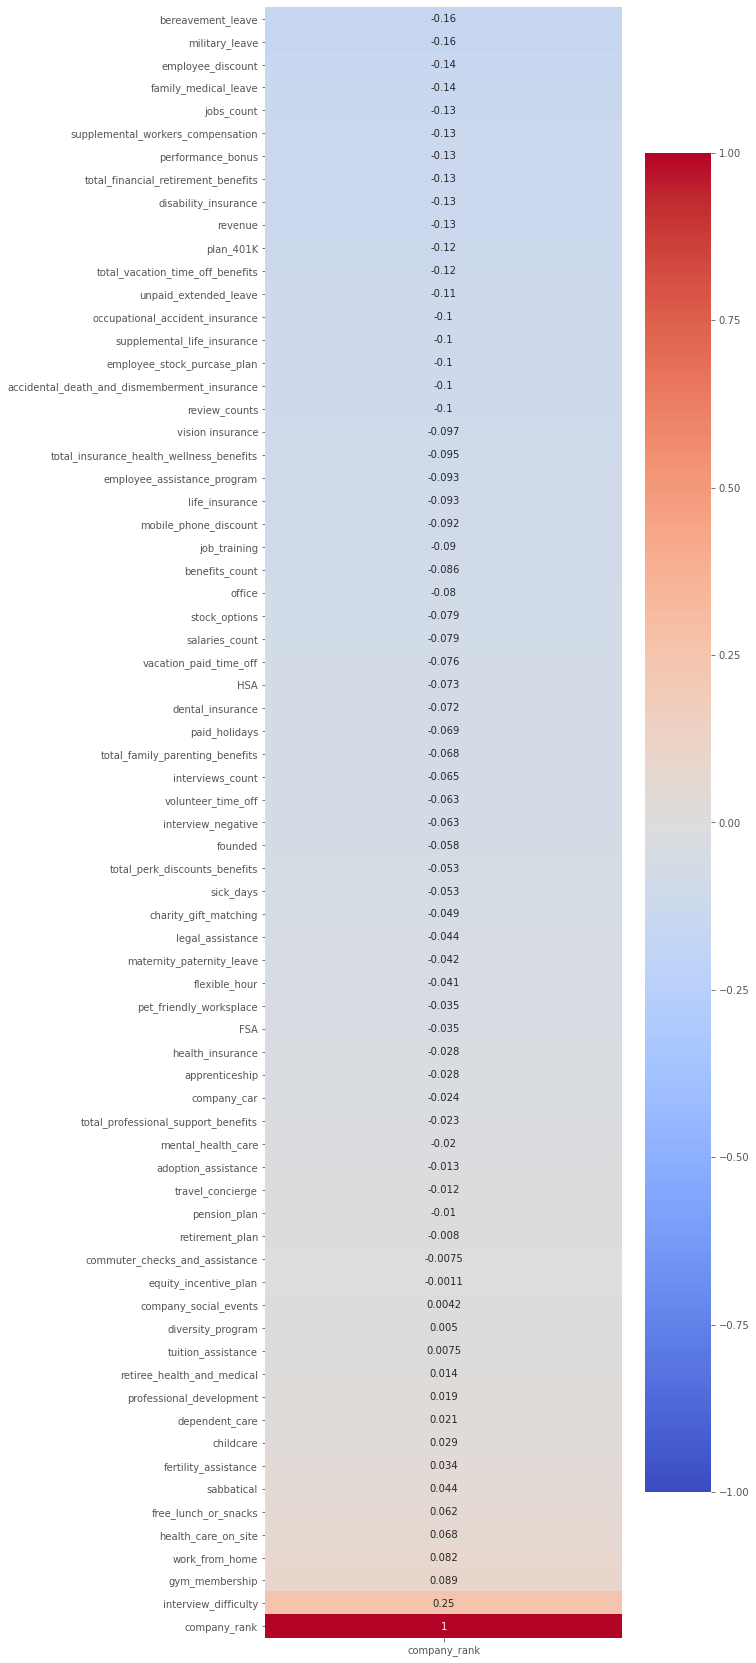

In [199]:
# code from global lesson 3.07
plt.figure(figsize=(8, 30))
sns.heatmap(df.drop(columns = ['rating','benefits_score','size','interview_neutral', 'interview_possitive']).corr()[['company_rank']].sort_values('company_rank'),
            annot=True,
            cmap='coolwarm',
            vmin=-1, 
            vmax=1);

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 0 to 2648
Data columns (total 82 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          2233 non-null   object 
 1   industry                                      2233 non-null   object 
 2   office                                        2233 non-null   int64  
 3   size                                          2233 non-null   int64  
 4   review_counts                                 2233 non-null   float64
 5   salaries_count                                2233 non-null   float64
 6   jobs_count                                    2233 non-null   float64
 7   interviews_count                              2233 non-null   float64
 8   benefits_count                                2233 non-null   float64
 9   website                                       2233 non-null   o

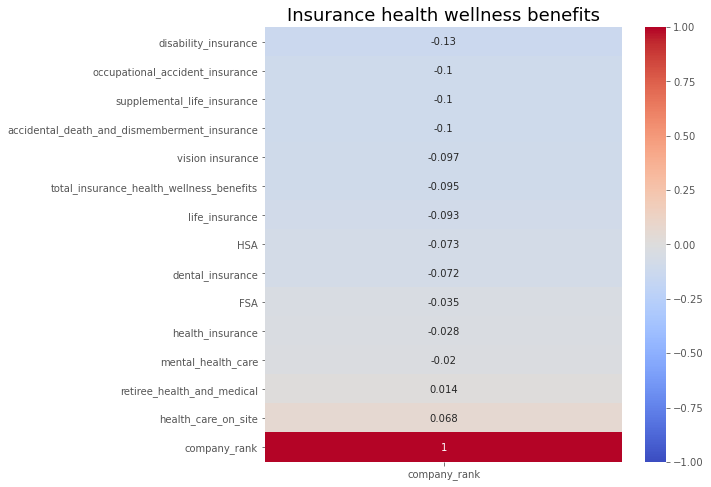

In [149]:
# Insurance health wellness benefits
plt.figure(figsize=(8, 8))
sns.heatmap(df[['total_insurance_health_wellness_benefits','health_insurance','dental_insurance',
                'FSA','vision insurance','HSA','life_insurance','supplemental_life_insurance',
                'disability_insurance','occupational_accident_insurance','health_care_on_site',
                'mental_health_care','retiree_health_and_medical','accidental_death_and_dismemberment_insurance',
                'company_rank']].corr()[['company_rank']].sort_values('company_rank'),
                annot=True,
                cmap='coolwarm',
                vmin=-1, 
                vmax=1)
plt.title ('Insurance health wellness benefits', fontsize = 18);

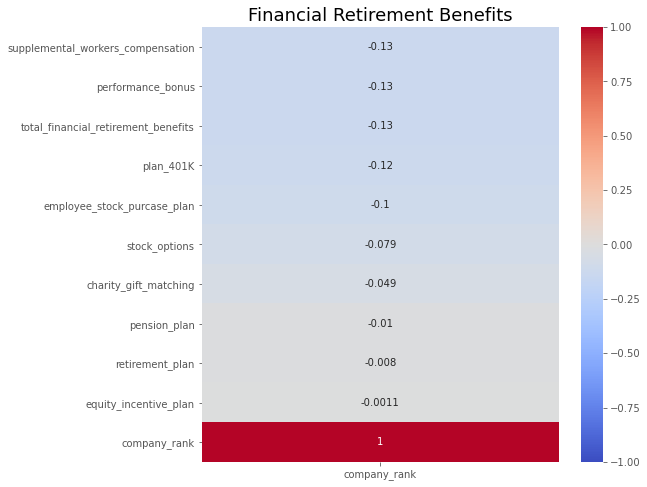

In [153]:
# Financial Retirement Benefits
plt.figure(figsize=(8, 8))
sns.heatmap(df[['total_financial_retirement_benefits','pension_plan','plan_401K',
                'retirement_plan','employee_stock_purcase_plan', 'performance_bonus',
                'stock_options','equity_incentive_plan','supplemental_workers_compensation',
                'charity_gift_matching','company_rank']].corr()[['company_rank']].sort_values('company_rank'),
                annot=True,
                cmap='coolwarm',
                vmin=-1, 
                vmax=1)
plt.title ('Financial Retirement Benefits', fontsize = 18);

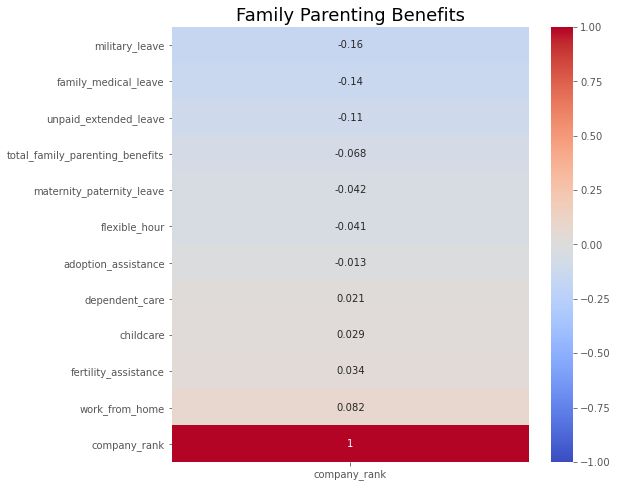

In [154]:
# Family Parenting Benefits
plt.figure(figsize=(8, 8))
sns.heatmap(df[['total_family_parenting_benefits','maternity_paternity_leave','work_from_home', 'fertility_assistance', 'dependent_care',
                'adoption_assistance', 'childcare','flexible_hour','military_leave',
                'family_medical_leave', 'unpaid_extended_leave','company_rank']].corr()[['company_rank']].sort_values('company_rank'),
                annot=True,
                cmap='coolwarm',
                vmin=-1, 
                vmax=1)
plt.title ('Family Parenting Benefits', fontsize = 18);

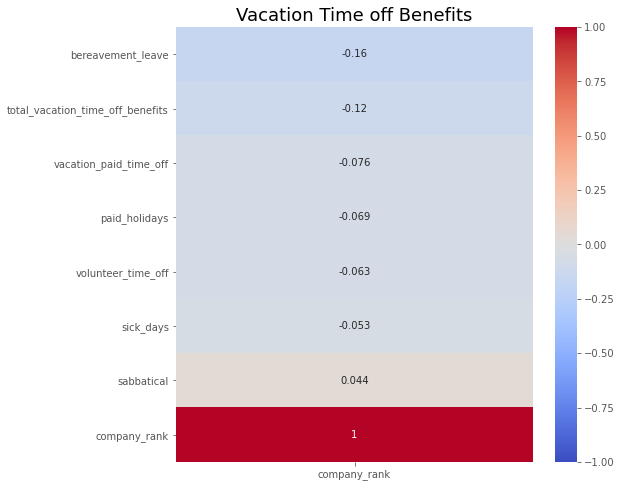

In [155]:
# Vacation Time off Benefits
plt.figure(figsize=(8, 8))
sns.heatmap(df[['total_vacation_time_off_benefits','vacation_paid_time_off','sick_days',
                'paid_holidays','volunteer_time_off','sabbatical', 'bereavement_leave','company_rank']].corr()[['company_rank']].sort_values('company_rank'),
                annot=True,
                cmap='coolwarm',
                vmin=-1, 
                vmax=1)
plt.title ('Vacation Time off Benefits', fontsize = 18);

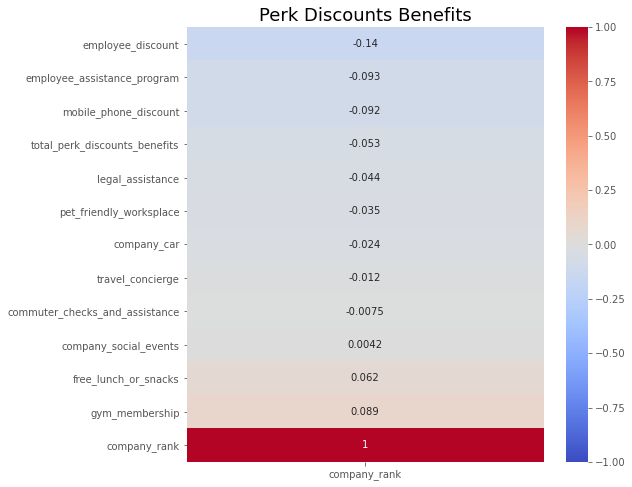

In [156]:
# Perk Discounts Benefits
plt.figure(figsize=(8, 8))
sns.heatmap(df[['total_perk_discounts_benefits','employee_discount','free_lunch_or_snacks',
                            'employee_assistance_program','gym_membership','commuter_checks_and_assistance',
                            'pet_friendly_worksplace','mobile_phone_discount','company_car','company_social_events',
                            'travel_concierge','legal_assistance','company_rank']].corr()[['company_rank']].sort_values('company_rank'),
                annot=True,
                cmap='coolwarm',
                vmin=-1, 
                vmax=1)
plt.title ('Perk Discounts Benefits', fontsize = 18);

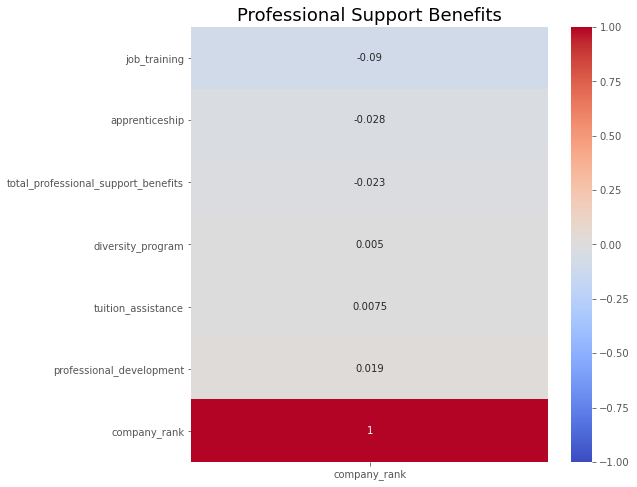

In [158]:
# Professional Support Benefits
plt.figure(figsize=(8, 8))
sns.heatmap(df[['total_professional_support_benefits','diversity_program','job_training',
                'professional_development','apprenticeship','tuition_assistance','company_rank']].corr()[['company_rank']].sort_values('company_rank'),
                annot=True,
                cmap='coolwarm',
                vmin=-1, 
                vmax=1)
plt.title ('Professional Support Benefits', fontsize = 18);

### Save the clean data into csv file

In [92]:
df.to_csv('data/clean_df.csv', index = False)

In [50]:
df.shape

(2233, 82)

In [56]:
df[df.company_rank == 0]['company_rank'].count()

773

In [55]:
df[df.company_rank == 1]['company_rank'].count()

915

In [54]:
df[df.company_rank == 2]['company_rank'].count()

545

In [109]:
df[df['rating' ]<2.7].count()

name                        4
industry                    4
office                      4
size                        4
review_counts               4
                           ..
professional_development    4
apprenticeship              4
tuition_assistance          4
category                    4
state                       4
Length: 82, dtype: int64

In [115]:
df.rating.median()

4.0

In [114]:
df[df['review_counts'] < 100]

,name,industry,office,size,review_counts,salaries_count,jobs_count,interviews_count,benefits_count,website,company_type,revenue,head_quarter,founded,interview_possitive,interview_negative,interview_neutral,interview_difficulty,benefits_score,rating,total_insurance_health_wellness_benefits,health_insurance,dental_insurance,FSA,vision insurance,HSA,life_insurance,supplemental_life_insurance,disability_insurance,occupational_accident_insurance,health_care_on_site,mental_health_care,retiree_health_and_medical,accidental_death_and_dismemberment_insurance,total_financial_retirement_benefits,pension_plan,plan_401K,retirement_plan,employee_stock_purcase_plan,performance_bonus,stock_options,equity_incentive_plan,supplemental_workers_compensation,charity_gift_matching,total_family_parenting_benefits,maternity_paternity_leave,work_from_home,fertility_assistance,dependent_care,adoption_assistance,childcare,flexible_hour,military_leave,family_medical_leave,unpaid_extended_leave,total_vacation_time_off_benefits,vacation_paid_time_off,sick_days,paid_holidays,volunteer_time_off,sabbatical,bereavement_leave,total_perk_discounts_benefits,employee_discount,free_lunch_or_snacks,employee_assistance_program,gym_membership,commuter_checks_and_assistance,pet_friendly_worksplace,mobile_phone_discount,company_car,company_social_events,travel_concierge,legal_assistance,total_professional_support_benefits,diversity_program,job_training,professional_development,apprenticeship,tuition_assistance,category,state
334,Cross Country Nurses,Staffing & Outsourcing,12,1,64.0,5700.0,5100.0,7.0,4.0,https://www.crosscountrynurses.com/,Subsidiary or Business Segment,1,"Boca Raton, FL",1986.0,1.00,0.17,0.17,2.8,4.3,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Business Services,FL
859,Medasource,Consulting,1,1,56.0,279.0,0.0,23.0,15.0,https://www.medasource.com/,Private,1,"Indianapolis, IN",2000.0,0.83,0.09,0.09,2.6,3.2,4.6,3,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Business Services,IN
868,Advantest,Electrical & Electronic Manufacturing,3,1,87.0,331.0,63.0,13.0,39.0,https://www.advantest.com/,Public,6,"Tokyo, Japan",1954.0,0.46,0.23,0.31,2.7,3.7,4.6,6,1,1,0,1,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,0,1,0,0,0,2,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,3,0,1,1,0,1,Manufacturing,Japan
1075,NorthBay Healthcare,Health Care Services & Hospitals,7,1,98.0,171.0,57.0,17.0,24.0,https://www.northbay.org/,Nonprofit Organization,1,"Fairfield, CA",1955.0,0.71,0.06,0.24,2.7,4.3,4.3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Health Care Services & Hospitals,CA
1158,Tecta America,Construction,79,1,65.0,96.0,86.0,6.0,21.0,https://www.tectaamerica.com/,Private,4,"Rosemont, IL",2000.0,1.00,0.17,0.17,2.7,4.2,4.2,6,1,1,1,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Construction,IL
1243,Dickinson Fleet Services,Trucking,6,1,94.0,248.0,112.0,4.0,8.0,https://www.dickinsonfleet.com/,Private,3,"Indianapolis, IN",1997.0,0.25,0.50,0.25,2.3,3.0,4.1,4,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Transportation & Logistics,IN
1298,Tandem Diabetes,Health Care Products Manufacturing,1,1,93.0,136.0,112.0,35.0,24.0,https://www.tandemdiabetes.com/,Public,2,"San Diego, CA",2006.0,0.59,0.38,0.03,2.5,3.9,3.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Manufacturing,CA
1395,Castle Group,Real Estate,10,1,80.0,291.0,153.0,15.0,36.0,https://www.castlegroup.com/,Private,2,"Plantation, FL",1952.0,0.47,0.27,0.27,2.6,3.5,4.1,3,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,Real Estate,FL
1435,Hillcres

In [59]:
df.rating.value_counts()

4.0    333
3.9    321
3.8    321
4.1    261
4.2    189
4.3    149
3.7    137
4.4    100
3.6     75
3.5     61
4.5     52
3.4     48
3.3     47
3.2     34
4.6     28
3.1     22
3.0     16
4.7     15
4.8     11
2.9      4
2.8      3
2.6      2
2.1      1
4.9      1
2.4      1
2.7      1
Name: rating, dtype: int64

In [90]:
df.drop(df[df['rating']< 3.0].index, inplace = True) 

In [91]:
df.company_rank.value_counts()

1    915
0    761
2    545
Name: company_rank, dtype: int64

In [63]:
df[df.name == 'General Assembly']

,name,industry,office,size,review_counts,salaries_count,jobs_count,interviews_count,benefits_count,website,company_type,revenue,head_quarter,founded,interview_possitive,interview_negative,interview_neutral,interview_difficulty,benefits_score,rating,total_insurance_health_wellness_benefits,health_insurance,dental_insurance,FSA,vision insurance,HSA,life_insurance,supplemental_life_insurance,disability_insurance,occupational_accident_insurance,health_care_on_site,mental_health_care,retiree_health_and_medical,accidental_death_and_dismemberment_insurance,total_financial_retirement_benefits,pension_plan,plan_401K,retirement_plan,employee_stock_purcase_plan,performance_bonus,stock_options,equity_incentive_plan,supplemental_workers_compensation,charity_gift_matching,total_family_parenting_benefits,maternity_paternity_leave,work_from_home,fertility_assistance,dependent_care,adoption_assistance,childcare,flexible_hour,military_leave,family_medical_leave,unpaid_extended_leave,total_vacation_time_off_benefits,vacation_paid_time_off,sick_days,paid_holidays,volunteer_time_off,sabbatical,bereavement_leave,total_perk_discounts_benefits,employee_discount,free_lunch_or_snacks,employee_assistance_program,gym_membership,commuter_checks_and_assistance,pet_friendly_worksplace,mobile_phone_discount,company_car,company_social_events,travel_concierge,legal_assistance,total_professional_support_benefits,diversity_program,job_training,professional_development,apprenticeship,tuition_assistance,category,company_rank


In [68]:
df['state'] = df.head_quarter.apply(lambda head_quarter : head_quarter.split(',')[1])

In [76]:
df['state'].value_counts().head(50)

 CA                322
 NY                175
 TX                159
 IL                124
 FL                 85
 MA                 85
 OH                 79
 VA                 74
 PA                 72
 NC                 58
 NJ                 56
 GA                 54
 MO                 51
 DC                 47
 United Kingdom     47
 MN                 47
 WA                 42
 MD                 41
 MI                 41
 TN                 38
 AZ                 37
 WI                 33
 UT                 32
 CT                 30
 CO                 30
 Germany            23
 India              22
 IN                 21
 France             19
 Netherlands        18
 NE                 17
 Japan              16
 AL                 15
 SC                 15
 Switzerland        15
 KY                 14
 OR                 14
 IA                 13
 Canada             12
 OK                 11
 KS                 10
 LA                  8
 AR                  8
 Ireland   